In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
! pip install seaborn



[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
df = pd.read_csv('Mall_Customers.csv')
print(df.head())
print(df.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [17]:
#Select relevant features
X = df[['Age','Annual Income (k$)', 'Spending Score (1-100)']]
print(X.head())

   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


In [18]:
#Preprocessing (scaling the features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
#Elbow method to determine optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

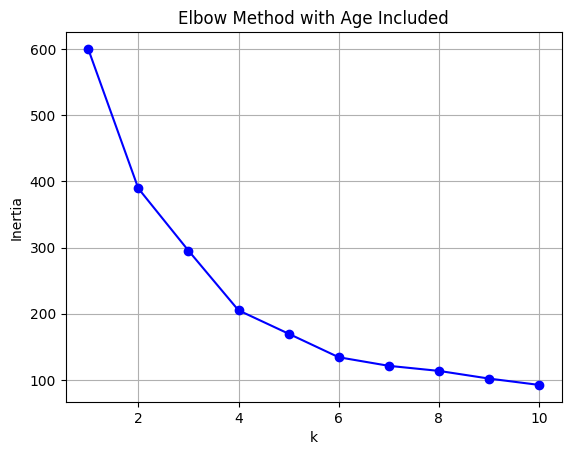

In [20]:
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method with Age Included')
plt.grid(True)
plt.show()

In [21]:
#On the basis of elbow curve,k=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [22]:
# Add cluster labels to the original data
df['Cluster'] = clusters
print(df.head(10))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   
5           6  Female   22                  17                      76   
6           7  Female   35                  18                       6   
7           8  Female   23                  18                      94   
8           9    Male   64                  19                       3   
9          10  Female   30                  19                      72   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  
5        2  
6        3  
7        2  
8        0  
9        2  


In [31]:
# Calculating silhouette score (requires at least 2 clusters)
if len(np.unique(df['Cluster'])) > 1:
    silhouette = silhouette_score(X_scaled, df['Cluster'])
    print("Silhouette Score:", silhouette)
else:
    print("Not enough clusters to compute silhouette score.")

Silhouette Score: 0.40846873777345605


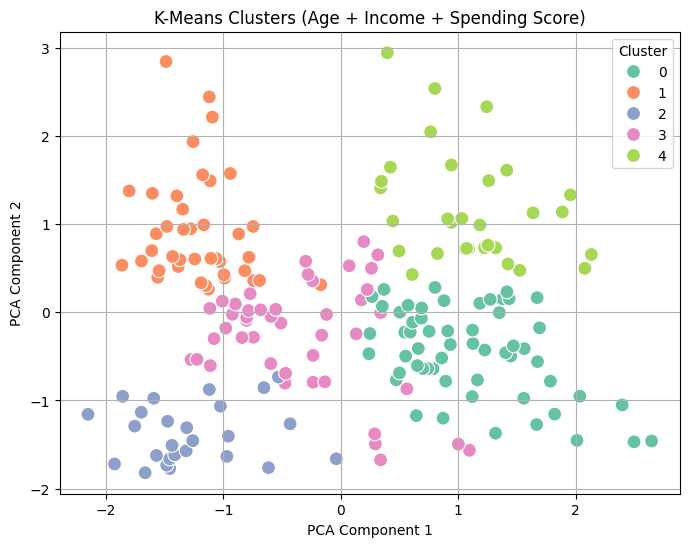

In [23]:

#PCA to reduce to 2d for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA-reduced clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set2', s=100)
plt.title('K-Means Clusters (Age + Income + Spending Score)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()




In [24]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871


In [25]:
cluster_labels = {
    0: 'Older Regulars',
    1: 'VIP Customers',
    2: 'Impulsive Youth',
    3: 'Careful Young Earners',
    4: 'Wealthy Cautious Buyers'
}
df['Segment'] = df['Cluster'].map(cluster_labels)



In [26]:
df.head(8)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Segment
0,1,Male,19,15,39,2,Impulsive Youth
1,2,Male,21,15,81,2,Impulsive Youth
2,3,Female,20,16,6,3,Careful Young Earners
3,4,Female,23,16,77,2,Impulsive Youth
4,5,Female,31,17,40,2,Impulsive Youth
5,6,Female,22,17,76,2,Impulsive Youth
6,7,Female,35,18,6,3,Careful Young Earners
7,8,Female,23,18,94,2,Impulsive Youth


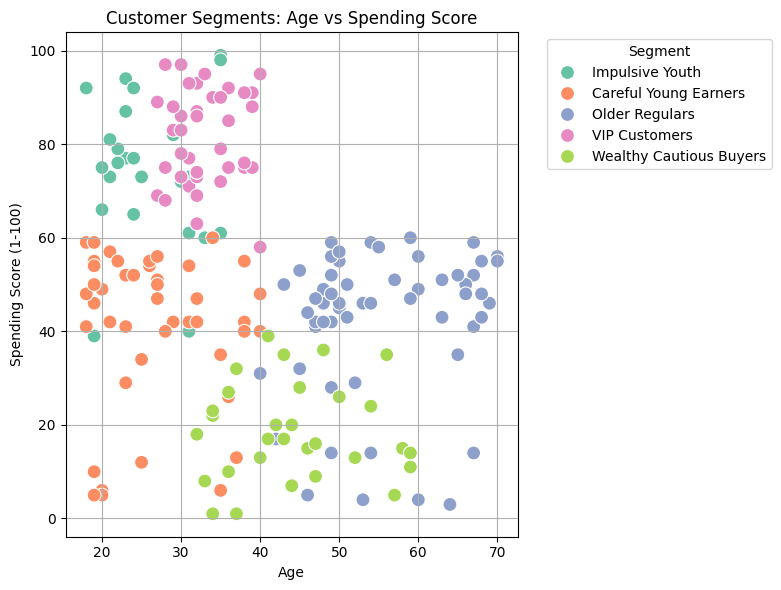

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Segment', palette='Set2', s=100)
plt.title('Customer Segments: Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


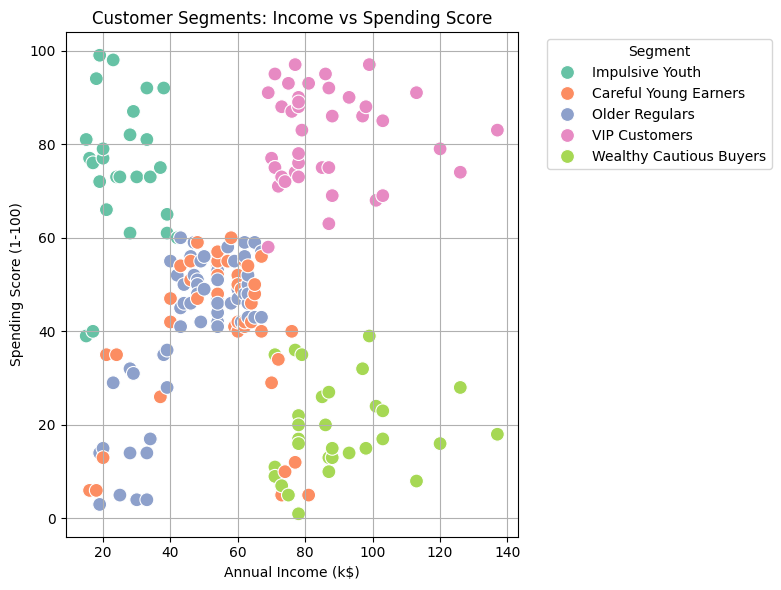

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Segment', palette='Set2', s=100)
plt.title('Customer Segments: Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [29]:
# Get PCA components
#Reduces 3 features into 2d for plotting (comp 1 and 2)
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Show how each original feature contributes to the components
components_df = pd.DataFrame(pca.components_, columns=X.columns, index=['PCA1', 'PCA2'])
print(components_df)


           Age  Annual Income (k$)  Spending Score (1-100)
PCA1  0.706382           -0.048024               -0.706199
PCA2  0.030141            0.998832               -0.037775
